# Import Libraries

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download dataset from Kaggle

In [2]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']='byhasdayoub'
os.environ['KAGGLE_KEY']='ee6d8b8ccd1185066d2fdec1e3e720dc'

In [3]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 1.88MB/s]


In [4]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [5]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [6]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#count of rows and columns
df.shape

(569, 33)

In [8]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Drop the column with null values
df.dropna(axis=1,inplace=True)

In [10]:
# count of rows and columns
df.shape

(569, 32)

In [11]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [12]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit_transform(df.iloc[:,1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [14]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [15]:
#Splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [16]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3)

In [25]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [26]:
#print data
X_train


array([[-0.68319469,  1.17987044, -0.63616325, ...,  0.24467031,
        -0.17341716,  0.9260826 ],
       [ 0.24740416, -0.58176156,  0.24330469, ...,  0.15993387,
         0.79040017,  0.79174501],
       [ 2.11674119,  0.60325378,  2.14352058, ...,  1.94545168,
        -0.27105878,  0.11071184],
       ...,
       [ 0.8090192 ,  0.64184623,  0.74641844, ...,  1.26756017,
         0.47700205, -0.47570094],
       [-0.15413704, -0.82693714, -0.20408195, ..., -0.33910323,
        -0.60335528, -1.09482199],
       [-0.39017814,  2.31267245, -0.44072593, ..., -0.75128547,
        -0.79706367, -1.11000798]])

# Build the classifers

In [19]:
#build the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
# Initialize the classifiers
logreg = LogisticRegression()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
svm = SVC(probability=True)  # Set probability=True for ROC curve
knn = KNeighborsClassifier()
logreg.fit(X_train,Y_train)
naive_bayes.fit(X_train,Y_train)
decision_tree.fit(X_train,Y_train)
svm.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [20]:
#make use of trained model to make predictions on test data
logreg_preds = logreg.predict(X_test)
naive_bayes_preds = naive_bayes.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
svm_preds = svm.predict(X_test)
knn_preds = knn.predict(X_test)
# logreg_preds naive_bayes_preds decision_tree_preds svm_preds knn_preds

# Evaluate the models

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels
le = LabelEncoder()
Y_test_encoded = le.fit_transform(Y_test)

# Calculate evaluation metrics
accuracy = {
    'Logistic Regression': accuracy_score(Y_test_encoded, logreg_preds_encoded),
    'Naive Bayes': accuracy_score(Y_test_encoded, naive_bayes_preds_encoded),
    'Decision Tree': accuracy_score(Y_test_encoded, decision_tree_preds_encoded),
    'SVM': accuracy_score(Y_test_encoded, svm_preds_encoded),
    'KNN': accuracy_score(Y_test_encoded, knn_preds_encoded)
}

precision = {
    'Logistic Regression': precision_score(Y_test_encoded, logreg_preds_encoded),
    'Naive Bayes': precision_score(Y_test_encoded, naive_bayes_preds_encoded),
    'Decision Tree': precision_score(Y_test_encoded, decision_tree_preds_encoded),
    'SVM': precision_score(Y_test_encoded, svm_preds_encoded),
    'KNN': precision_score(Y_test_encoded, knn_preds_encoded)
}

recall = {
    'Logistic Regression': recall_score(Y_test_encoded, logreg_preds_encoded),
    'Naive Bayes': recall_score(Y_test_encoded, naive_bayes_preds_encoded),
    'Decision Tree': recall_score(Y_test_encoded, decision_tree_preds_encoded),
    'SVM': recall_score(Y_test_encoded, svm_preds_encoded),
    'KNN': recall_score(Y_test_encoded, knn_preds_encoded)
}

f1 = {
    'Logistic Regression': f1_score(Y_test_encoded, logreg_preds_encoded),
    'Naive Bayes': f1_score(Y_test_encoded, naive_bayes_preds_encoded),
    'Decision Tree': f1_score(Y_test_encoded, decision_tree_preds_encoded),
    'SVM': f1_score(Y_test_encoded, svm_preds_encoded),
    'KNN': f1_score(Y_test_encoded, knn_preds_encoded)
}

confusion_matrices = {
    'Logistic Regression': confusion_matrix(Y_test_encoded, logreg_preds_encoded),
    'Naive Bayes': confusion_matrix(Y_test_encoded, naive_bayes_preds_encoded),
    'Decision Tree': confusion_matrix(Y_test_encoded, decision_tree_preds_encoded),
    'SVM': confusion_matrix(Y_test_encoded, svm_preds_encoded),
    'KNN': confusion_matrix(Y_test_encoded, knn_preds_encoded)
}

roc_curves = {}
auc_scores = {}

# Calculate ROC curves and AUC scores
for model_name, model in [('Logistic Regression', logreg), ('Naive Bayes', naive_bayes),
                          ('Decision Tree', decision_tree), ('SVM', svm), ('KNN', knn)]:
    fpr, tpr, _ = roc_curve(Y_test_encoded, model.predict_proba(X_test)[:, 1])
    roc_curves[model_name] = (fpr, tpr)
    auc_scores[model_name] = roc_auc_score(Y_test_encoded, model.predict_proba(X_test)[:, 1])

# Rest of the code remains the same

# Print evaluation results
for model_name in accuracy:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy[model_name]}")
    print(f"Precision: {precision[model_name]}")
    print(f"Recall: {recall[model_name]}")
    print(f"F1-score: {f1[model_name]}")
    print(f"Confusion Matrix:\n{confusion_matrices[model_name]}")
    print()

Model: Logistic Regression
Accuracy: 0.9649122807017544
Precision: 0.9552238805970149
Recall: 0.9552238805970149
F1-score: 0.9552238805970149
Confusion Matrix:
[[101   3]
 [  3  64]]

Model: Naive Bayes
Accuracy: 0.9298245614035088
Precision: 0.8767123287671232
Recall: 0.9552238805970149
F1-score: 0.9142857142857143
Confusion Matrix:
[[95  9]
 [ 3 64]]

Model: Decision Tree
Accuracy: 0.8947368421052632
Precision: 0.8656716417910447
Recall: 0.8656716417910447
F1-score: 0.8656716417910447
Confusion Matrix:
[[95  9]
 [ 9 58]]

Model: SVM
Accuracy: 0.9590643274853801
Precision: 0.9411764705882353
Recall: 0.9552238805970149
F1-score: 0.9481481481481482
Confusion Matrix:
[[100   4]
 [  3  64]]

Model: KNN
Accuracy: 0.9707602339181286
Precision: 0.9696969696969697
Recall: 0.9552238805970149
F1-score: 0.9624060150375939
Confusion Matrix:
[[102   2]
 [  3  64]]



# Performance Evaluation

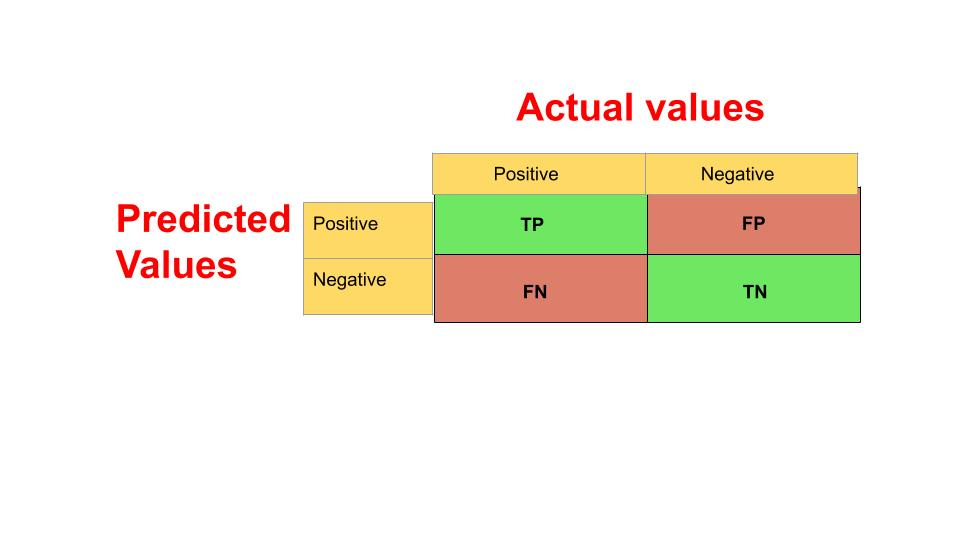

[[101   3]
 [  3  64]]


<Axes: >

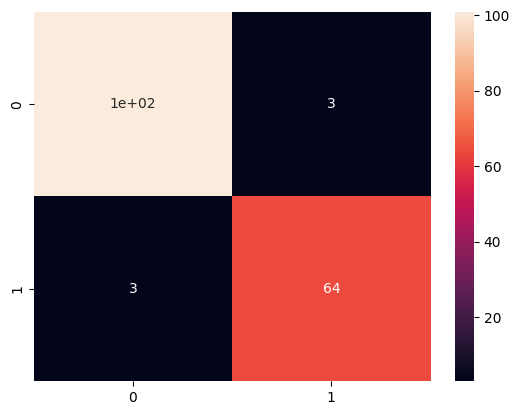

In [33]:
#plot confusion matrix logestic regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1 = confusion_matrix(Y_test,logreg_preds)
print(cm1)
sns.heatmap(cm1,annot=True)

[[95  9]
 [ 3 64]]


<Axes: >

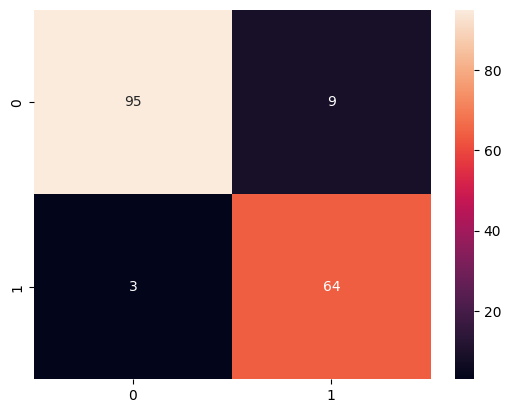

In [34]:
#plot confusion matrix naive_bayes_preds

cm2 = confusion_matrix(Y_test,naive_bayes_preds)
print(cm2)
sns.heatmap(cm2,annot=True)

[[95  9]
 [ 9 58]]


<Axes: >

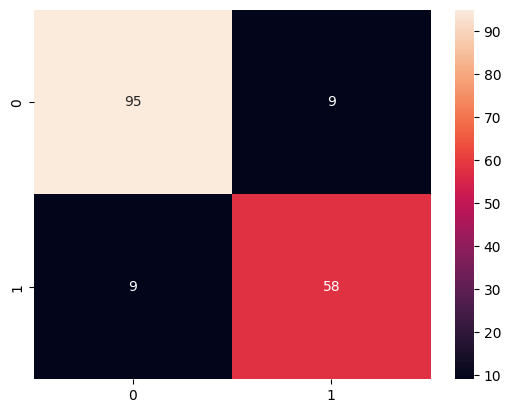

In [35]:
#plot confusion matrix decision_tree_preds

cm3 = confusion_matrix(Y_test,decision_tree_preds)
print(cm3)
sns.heatmap(cm3,annot=True)

[[100   4]
 [  3  64]]


<Axes: >

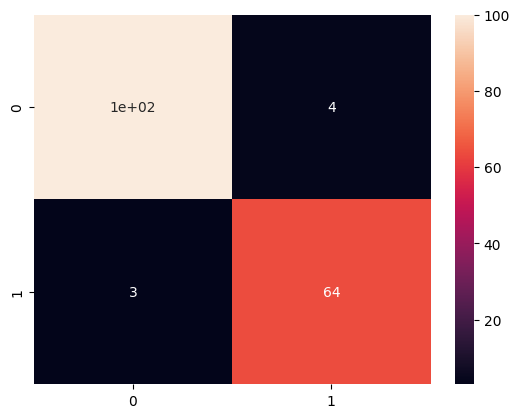

In [36]:
#plot confusion matrix svm

cm4 = confusion_matrix(Y_test,svm_preds)
print(cm4)
sns.heatmap(cm4,annot=True)

[[102   2]
 [  3  64]]


<Axes: >

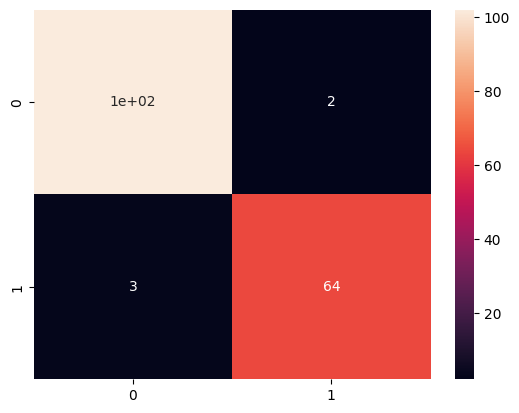

In [37]:
#plot confusion matrix knn

cm5 = confusion_matrix(Y_test,knn_preds)
print(cm5)
sns.heatmap(cm5,annot=True)

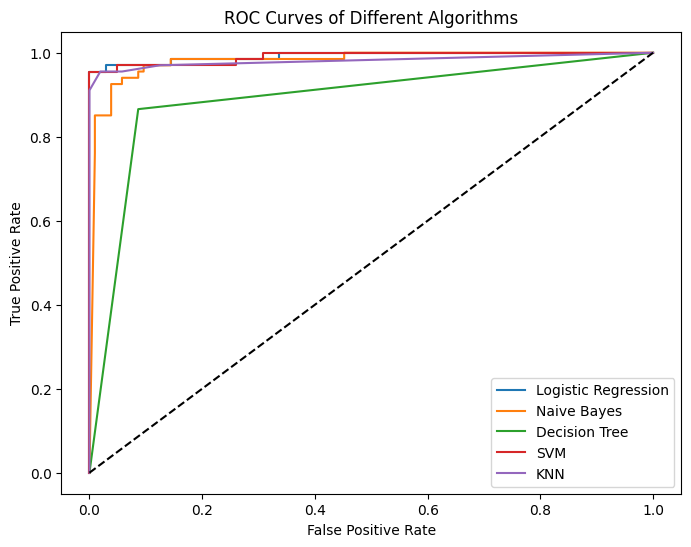

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for model_name, roc_curve_data in roc_curves.items():
    fpr, tpr = roc_curve_data
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Different Algorithms')
plt.legend()
plt.show()

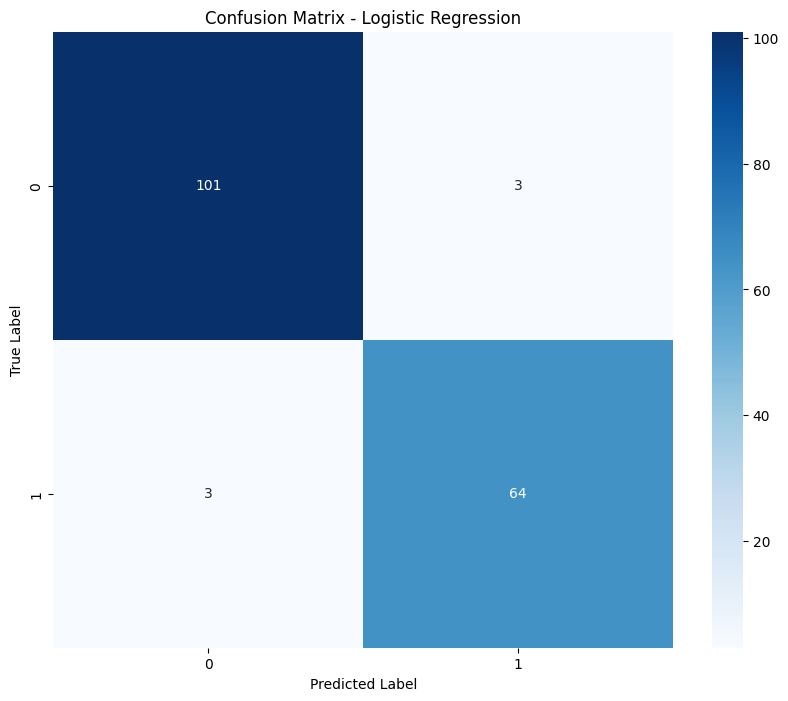

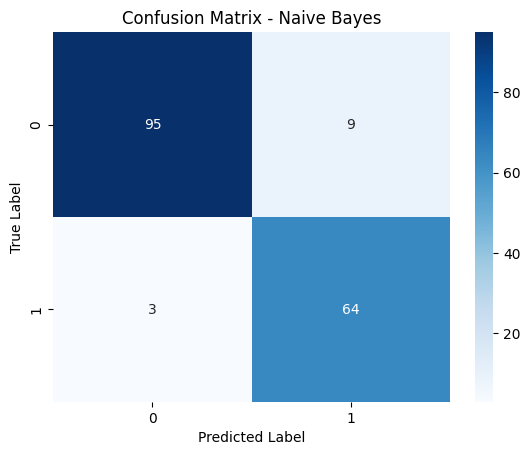

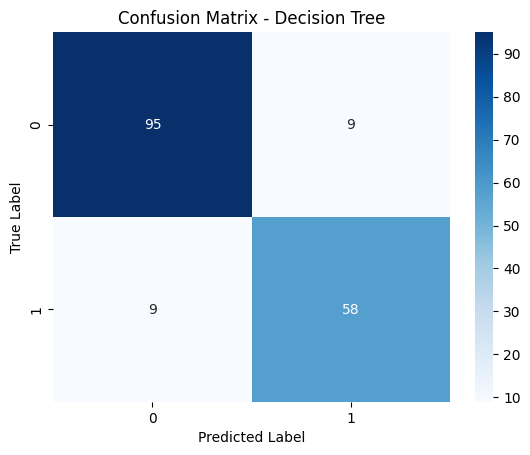

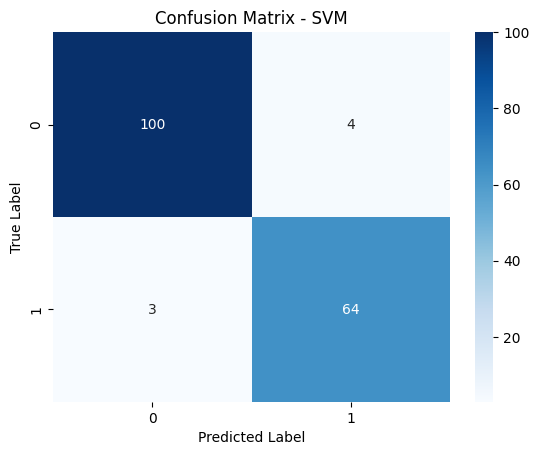

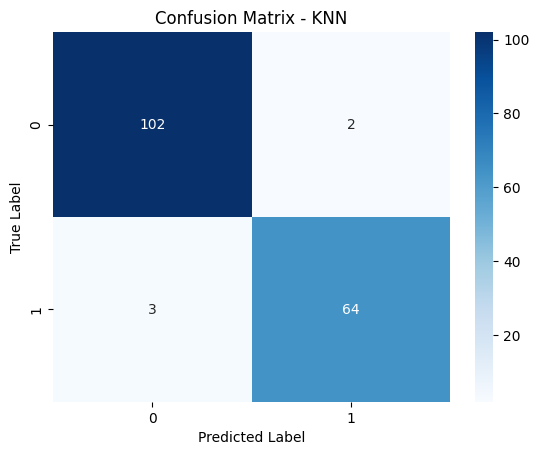

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for model_name, confusion_matrix_data in confusion_matrices.items():
    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<ipython-input-52-a8efa9170622>:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = Z.astype(np.float)
<ipython-input-52-a8efa9170622>:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = Z.astype(np.float)
<ipython-input-52-a8efa9170622>:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this 

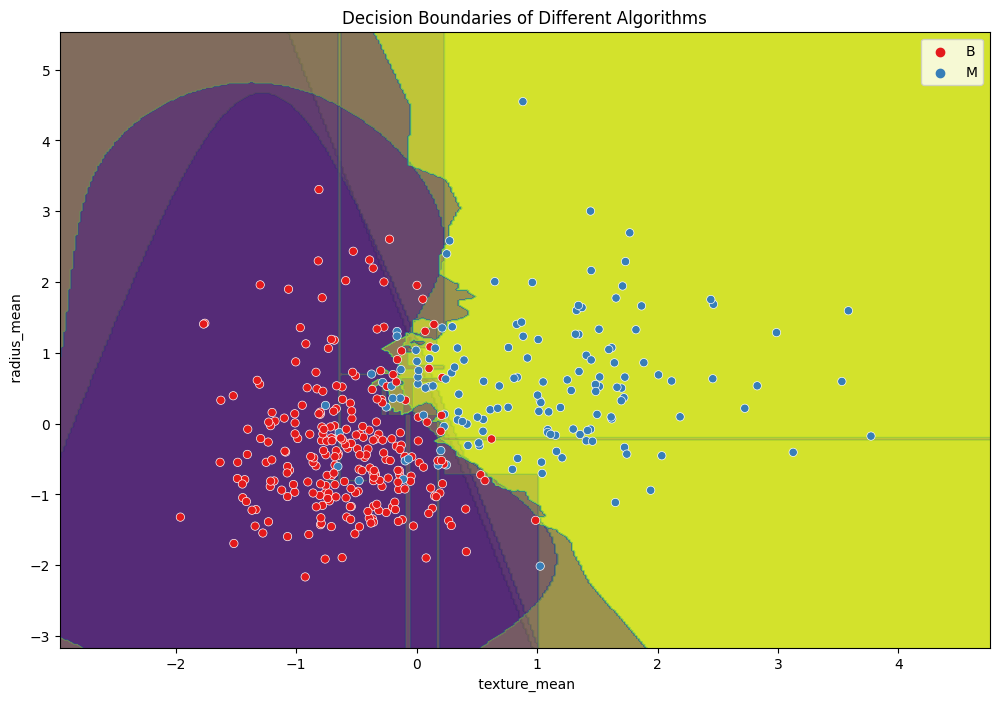

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.figure(figsize=(12, 8))
selected_features = [0, 1]
feature_names = [' texture_mean', ' radius_mean']

# Plotting decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, selected_features[0]].min() - 1, X_train[:, selected_features[0]].max() + 1
y_min, y_max = X_train[:, selected_features[1]].min() - 1, X_train[:, selected_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a label encoder object
label_encoder = LabelEncoder()

# Convert string class labels to numeric values
Y_train_encoded = label_encoder.fit_transform(Y_train)

for model_name, model in [('Logistic Regression', logreg), ('Naive Bayes', naive_bayes),
                          ('Decision Tree', decision_tree), ('SVM', svm), ('KNN', knn)]:
    model.fit(X_train[:, selected_features], Y_train_encoded)  # Use the encoded labels
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.astype(np.float)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)

# Scatter plot of the data points
sns.scatterplot(x=X_train[:, selected_features[0]], y=X_train[:, selected_features[1]], hue=Y_train, palette='Set1')

plt.legend()
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Decision Boundaries of Different Algorithms')
plt.show()